<a href="https://colab.research.google.com/github/lkarjun/workouts-pytorch-basics-to-advance/blob/main/basics/1.quick_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quick start
### Tutorial 1
* https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
# Downloading dataset

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14832379.23it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269107.02it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5007620.41it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14758904.30it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [11]:
isinstance(training_data, Dataset)

True

* Dataloader
  * Helps to iterate over dataset
  * supports, automatic batching, sampling, shuffling and multiprocess dataloading

In [5]:
batch_size = 16

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [7]:
for X, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([16, 1, 28, 28])
Shape of y: torch.Size([16]) torch.int64


## Creating Models

In [14]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.seq = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.seq(x)
    return logits

In [15]:
model = Model().to("cpu")

In [16]:
print(model)

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Optimizing the model params

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

## Training Model

In [24]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to("cpu"), y.to("cpu")

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [26]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to("cpu"), y.to("cpu")
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [27]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.164294  [   16/60000]
loss: 0.993496  [ 1616/60000]
loss: 1.055751  [ 3216/60000]
loss: 1.117747  [ 4816/60000]
loss: 0.999255  [ 6416/60000]
loss: 1.150059  [ 8016/60000]
loss: 1.102987  [ 9616/60000]
loss: 0.939750  [11216/60000]
loss: 1.035524  [12816/60000]
loss: 1.023446  [14416/60000]
loss: 1.051987  [16016/60000]
loss: 0.889090  [17616/60000]
loss: 0.817446  [19216/60000]
loss: 1.446965  [20816/60000]
loss: 1.020388  [22416/60000]
loss: 1.019483  [24016/60000]
loss: 0.776900  [25616/60000]
loss: 1.112740  [27216/60000]
loss: 1.128645  [28816/60000]
loss: 0.940348  [30416/60000]
loss: 0.860256  [32016/60000]
loss: 0.588639  [33616/60000]
loss: 0.693590  [35216/60000]
loss: 0.932878  [36816/60000]
loss: 1.255751  [38416/60000]
loss: 0.804618  [40016/60000]
loss: 0.851723  [41616/60000]
loss: 0.852897  [43216/60000]
loss: 0.611158  [44816/60000]
loss: 0.810461  [46416/60000]
loss: 0.796830  [48016/60000]
loss: 0.686658  [49616/60000]


## Saving Models

Store internal states
  * optimizer state

In [28]:
torch.save(model.state_dict(), "model.pth")
print("SAved PyTorch Model State to model.pth")

SAved PyTorch Model State to model.pth


## Loading Models

In [29]:
model = Model().to("cpu")

model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

## Inference

In [30]:
import matplotlib.pyplot as plt

In [31]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [32]:
x, y = test_data[0][0], test_data[0][1]

In [33]:
model.eval()

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

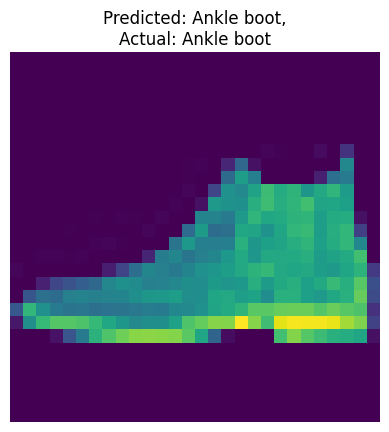

In [53]:
with torch.no_grad():
  x = x.to("cpu")
  pred = model(x)


  # Get idx of top label
  top_pred_decoded = classes[pred[0].argmax(0)]
  actual = classes[y]

plt.imshow(x.squeeze(0))
plt.title(f"Predicted: {top_pred_decoded},\nActual: {actual}")
plt.axis("ofF")
plt.show()